Codigo para encontrar una distribucion mejorada para los teclados 

In [ ]:
import numpy as np
import random
import warnings
import copy
import pandas as pd
import time
import csv
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

###CLASE INDIVIDUO###

In [ ]:
class Individuo:
  def __init__(self,n_variables,verbose=False):
    #Numero de variables del individuo
    self.n_variables = n_variables
    #Valor de la variables
    self.valor_variables=np.repeat(None,n_variables)
    #Fitness del individuo
    self.fitness = None
    #Valor de la funcion objetivo
    self.valor_funcion = None

    # se asignan valor las variables
    self.valor_variables = np.array([x for x in range(self.n_variables)])
    random.shuffle(self.valor_variables)

    #random.shuffle(self.valor_variables)

    if verbose:
      print("Nuevo individuo creado")
      print("valor: ",self.valor_variables)
      print("valor funcion objetivo: ",self.valor_funcion)
      print("Fitness: " , self.fitness)

  def calcular_fitness(self,funcion_objetivo,optimizacion,verbose=False,Grafo=[],ArregloD=[]):
    self.valor_funcion = funcion_objetivo(Grafo,self.valor_variables,ArregloD)
    if optimizacion == "maximizar":
        self.fitness = self.valor_funcion
    elif optimizacion == "minimizar":
        self.fitness = -self.valor_funcion
    
    if verbose:
      print("El individuo ha sido evaluado")
      print("-----------------------------")
      print("Valor función objetivo: " + str(self.valor_funcion))
      print("Fitness: " + str(self.fitness))
      print("")

  def mutar(self,prob_mut=0.01,distribucion="uniforme", verbose=False):
    check = random.uniform(0, 1)
    #Mutar solo si la probalidad es mejor de prob_mut
    #Tipo de mutacion utilizada MUTACION POR INVERSION
    if(check <= prob_mut):
      random.shuffle(self.valor_variables)
      self.fitness = None
      self.valor_funcion = None
      if verbose:
        print("El individuo ha sido mutado")
        print("---------------------------")
        
        print("Valor variables: " + str(self.valor_variables))
        print("")



###CLASE POBLACION###

In [ ]:
class Poblacion:
    def __init__(self,n_individuos,n_variables,verbose=False):
      # Número de individuos de la población
      self.n_individuos = n_individuos
      # Número de variables de cada individuo
      self.n_variables = n_variables  
      self.individuos = []
      # Etiqueta para saber si la población ha sido optimizada
      self.optimizado = False
      # Número de iteraciones de optimización llevadas a cabo
      self.iter_optimizacion = None
      # Mejor individuo de la población
      self.mejor_individuo = None
      # Fitness del mejor individuo de la población (el de mayor fitness)
      self.mejor_fitness = None
      # Valor de la función objetivo del mejor individuo de la población
      self.mejor_valor_funcion = None
      # Valor de las variables del mejor individuo de la población
      self.mejor_valor_variables = None
      # Información de todas los individuos de la población en cada generación
      self.historico_individuos = []
      # Valor de las variables del mejor individuo en cada generación
      self.historico_mejor_valor_variables = []
      # Fitness del mejor individuo en cada generación
      self.historico_mejor_fitness = []
      # Valor de la función objetivo del mejor individuo en cada generación
      self.historico_mejor_valor_funcion = []
      # Diferencia absoluta entre el mejor fitness de generaciones consecutivas
      self.diferencia_abs = []
      # data.frame con la información del mejor fitness y valor de variables
      # encontrado en cada generación, así como la diferencia respecto a la 
      # generación anterior.
      self.resultados_df = None
      # Fitness del mejor individuo de todas las generaciones
      self.fitness_optimo = None
      # Valor de las variables del mejor individuo de todas las generaciones
      self.valor_variables_optimo = None
      # Valor de función objetivo del mejor individuo de todas las generaciones
      self.valor_funcion_optimo = None
      
      # SE CREAN LOS INDIVIDUOS DE LA POBLACIÓN Y SE ALMACENAN
      # ----------------------------------------------------------------------
      for i in np.arange(n_individuos):
          individuo_i = Individuo(
                          n_variables = self.n_variables,
                          verbose     = verbose
                        )
          self.individuos.append(individuo_i)
      if verbose:
          print("----------------")
          print("Población creada")
          print("----------------")
          print("Número de individuos: " + str(self.n_individuos))
        
          print("")
    def __repr__(self):
        """
        Información que se muestra cuando se imprime un objeto población.

        """

        texto = "============================" \
                + "\n" \
                + "         Población" \
                + "\n" \
                + "============================" \
                + "\n" \
                + "Número de individuos: " + str(self.n_individuos) \
                + "Optimizado: " + str(self.optimizado) \
                + "\n" \
                + "Iteraciones optimización (generaciones): " \
                     + str(self.iter_optimizacion) \
                + "\n" \
                + "\n" \
                + "Información del mejor individuo:" \
                + "\n" \
                + "----------------------------" \
                + "\n" \
                + "Valor variables: " + str(self.mejor_valor_variables) \
                + "\n" \
                + "Fitness: " + str(self.mejor_fitness) \
                + "\n" \
                + "\n" \
                + "Resultados tras optimizar:" \
                + "\n" \
                + "--------------------------" \
                + "\n" \
                + "Valor óptimo de variables: " + str(self.valor_variables_optimo) \
                + "\n" \
                + "Valor óptimo función objetivo: " + str(self.valor_funcion_optimo) \
                + "\n" \
                + "Fitness óptimo: " + str(self.fitness_optimo)
        return(texto)
    def mostrar_individuos(self, n=None):

        if n is None:
            n = self.n_individuos
        elif n > self.n_individuos:
            n = self.n_individuos

        for i in np.arange(n):
            print(self.individuos[i])
        return(None)
    def evaluar_poblacion(self,funcion_objetivo,optimizacion,verbose=False,Grafo=[],ArregloD=[]):
        
        for i in np.arange(self.n_individuos):
            self.individuos[i].calcular_fitness(
                funcion_objetivo = funcion_objetivo,
                optimizacion     = optimizacion,
                verbose          = verbose,
                Grafo            = Grafo,
                ArregloD          =ArregloD
            )

        # Se selecciona inicialmente como mejor individuo el primero.
        self.mejor_individuo = copy.deepcopy(self.individuos[0])
        for i in np.arange(self.n_individuos):
            if self.individuos[i].fitness > self.mejor_individuo.fitness:
                self.mejor_individuo = copy.deepcopy(self.individuos[i])
        
        # Se extrae la información del mejor individuo de la población.
        self.mejor_fitness = self.mejor_individuo.fitness
        self.mejor_valor_variables = self.mejor_individuo.valor_variables
        self.mejor_valor_funcion = self.mejor_individuo.valor_funcion
        if verbose:
            print("------------------")
            print("Población evaluada")
            print("------------------")
            print("Mejor fitness encontrado : " + str(self.mejor_fitness))
            print("Valor de la función objetivo: " \
                + str(self.mejor_valor_funcion))
            print("Mejor valor de variables encontrado : "
                + str(self.mejor_valor_variables))
            print("")

    def cruzar_individuos(self,parental_1,parental_2,verbose=False):
      # Se extraen los parentales acorde a los índices indicados.
      parental_1 = self.individuos[parental_1]
      parental_2 = self.individuos[parental_2]
      #Tipo de cruza utilizada: Cruza ordenada
      n=np.random.randint(0, self.n_variables)
      while True:
          m = np.random.randint(0, self.n_variables)
          if n != m:
              break
      i, j = min(m, n), max(m, n)
      # Se clona  los parentales para utilizarlo como plantilla como los nuevos
      # individuos.
      descendencia1 = copy.deepcopy(parental_1)
      descendencia1.valor_variables = np.repeat(None, descendencia1.n_variables)
      descendencia1.fitness = None 

      descendencia2 = copy.deepcopy(parental_2)
      descendencia2.valor_variables = np.repeat(None, descendencia2.n_variables)
      descendencia2.fitness = None    

      descendencia1.valor_variables[i:j]=parental_2.valor_variables[i:j]
      descendencia2.valor_variables[i:j]=parental_1.valor_variables[i:j]

      lista = list(range(j,len(descendencia1.valor_variables)))+list(range(0,j))
      tempv1 = list(parental_1.valor_variables)
      tempv2 = list(parental_2.valor_variables)
      ##Cruza ordenada 
      for m in lista:
        for n in tempv1:
            #print("m",m,"n",n)
            if not(n in descendencia1.valor_variables):
              descendencia1.valor_variables[m]=n
              #print(" n",n)
              tempv1.pop(tempv1.index(n))
              break
  
      
        for n in tempv2:
            #print("m",m,"n",n)
            if not(n in descendencia2.valor_variables):
              descendencia2.valor_variables[m]=n
              #print(" n",n)
              tempv2.pop(tempv2.index(n))
              break
      #Se crea un deepcopy para que el nuevo individuo sea independiente de 
      # los parentales. Esto evita problemas si posteriormente se muta.
      descendencia1 = copy.deepcopy(descendencia1)
      descendencia2 = copy.deepcopy(descendencia2)
      if verbose:
          print("------------------------------------")
          print("Cruce realizado: descendencia creada")
          print("------------------------------------")
          print("Valor variables: " + str(descendencia1.valor_variables)\
                +str(descendencia2.valor_variables))
          print("")
      return(descendencia1,descendencia2)

    def seleccionar_individuo(self,n,return_indices=True,metodo_seleccion="Torneo",verbose=False):
        if metodo_seleccion not in ["ruleta", "rank", "Torneo"]:
            raise Exception(
                "El método de selección debe de ser ruleta, rank o tournament"
                )

        # SELECCIÓN DE INDIVIDUOS
        # ----------------------------------------------------------------------
        # Se crea un array con el fitness de cada individuo de la población.
        array_fitness = np.repeat(None, self.n_individuos)
        for i in np.arange(self.n_individuos):
            array_fitness[i] = copy.copy(self.individuos[i].fitness)

        # Se calcula la probabilidad de selección de cada individuo en función
        # de su fitness.
        if metodo_seleccion == "ruleta":
            probabilidad_seleccion = array_fitness / np.sum(array_fitness)
            ind_seleccionado = np.random.choice(
                                    a       = np.arange(self.n_individuos),
                                    size    = n,
                                    p       = list(probabilidad_seleccion),
                                    replace = True)
        elif metodo_seleccion == "rank":
            # La probabilidad con este método es inversamente proporcional a la
            # posición en la que quedan ordenados los individuos de menor a mayor
            # fitness.
            order = np.flip(np.argsort(a=array_fitness) + 1)
            ranks = np.argsort(order) + 1
            probabilidad_seleccion = 1 / ranks
            probabilidad_seleccion = probabilidad_seleccion / np.sum(probabilidad_seleccion)
            ind_seleccionado = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = n,
                                p       = list(probabilidad_seleccion),
                                replace = True
                            )   
        elif metodo_seleccion == "Torneo":
            ind_seleccionado = np.repeat(None,n)
            for i in np.arange(n):
                # Se seleccionan aleatoriamente dos parejas de individuos.
                candidatos_a = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = 2,
                                replace = False
                            )
                candidatos_b = np.random.choice(
                                a       = np.arange(self.n_individuos),
                                size    = 2,
                                replace = False
                            )
                # De cada pareja se selecciona el de mayor fitness.
                if array_fitness[candidatos_a[0]] > array_fitness[candidatos_a[1]]:
                    ganador_a = candidatos_a[0]
                else:
                    ganador_a = candidatos_a[1]

                if array_fitness[candidatos_b[0]] > array_fitness[candidatos_b[1]]:
                    ganador_b = candidatos_b[0]
                else:
                    ganador_b = candidatos_b[1]

                # Se comparan los dos ganadores de cada pareja.
                if array_fitness[ganador_a] > array_fitness[ganador_b]:
                    ind_final = ganador_a
                else:
                    ind_final = ganador_b
                
                ind_seleccionado[i] = ind_final
        # INFORMACIÓN DEL PROCESO (VERBOSE)
        # ----------------------------------------------------------------------
        if verbose:
            print("----------------------")
            print("Individuo seleccionado")
            print("----------------------")
            print("Método selección: " + metodo_seleccion)
            print("")
        if(return_indices):
            return(ind_seleccionado)
        else:
            if n == 1:
                return(copy.deepcopy(self.individuos[int(ind_seleccionado)]))
            if n > 1:
                return(
                    [copy.deepcopy(self.individuos[i]) for i in ind_seleccionado]
                )   


    def crear_nueva_generecion(self,metodo_seleccion="Torneo",elitismo=0.1,
                               prob_mut=0.01,distribucion="uniforme",verbose=False,
                               verbose_seleccion=False,verbose_cruce=False, 
                               verbose_mutacion=False):
      # Lista donde almacenar los individuos de la nueva generación.
      nuevos_individuos = []

      #Elitismo
      if elitismo > 0:
        #Numero de indivudos que pasan a la siguiente generacion
        n_elitismo = int(np.ceil(self.n_individuos*elitismo))

        # Se identifican los n_elitismo individuos con mayor fitness (élite).
        array_fitness = np.repeat(None, self.n_individuos)
        for i in np.arange(self.n_individuos):
            array_fitness[i] = copy.copy(self.individuos[i].fitness)
        rank = np.flip(np.argsort(array_fitness))
        elite = [copy.deepcopy(self.individuos[i]) for i in rank[:n_elitismo]]
        # Se añaden los individuos élite a la lista de nuevos individuos.
        nuevos_individuos = nuevos_individuos + elite
      else:
        n_elitismo = 0
      # CREACIÓN DE NUEVOS INDIVIDUOS POR CRUCES
      # ----------------------------------------------------------------------
      for i in np.arange(self.n_individuos-n_elitismo):
          # Seleccionar parentales
          indice_parentales = self.seleccionar_individuo(
                                  n                = 2,
                                  return_indices   = True,
                                  metodo_seleccion = metodo_seleccion,
                                  verbose          = verbose_seleccion
                                )
          # Cruzar parentales para obtener la descendencia
          descendencia1,descendencia2 = self.cruzar_individuos(
                          parental_1 = indice_parentales[0],
                          parental_2 = indice_parentales[1],
                          verbose    = verbose_cruce
                          )
          # Mutar la descendencia
          descendencia1.mutar(
              prob_mut         = prob_mut,
              distribucion     = distribucion,
              verbose          = verbose_mutacion
          )         
          descendencia2.mutar(
              prob_mut         = prob_mut,
              distribucion     = distribucion,
              verbose          = verbose_mutacion
          )
          # Se añade la descendencia a la lista de nuevos individuos. Para
          # que no de error la unión, se introduce el individuo descendencia
          # dentro de una lista.
          nuevos_individuos = nuevos_individuos + [descendencia1]+[descendencia2]
      # ACTUALIZACIÓN INFORMACIÓN DE LA POBLACIÓN
      # ----------------------------------------------------------------------
      self.individuos = copy.deepcopy(nuevos_individuos)
      self.mejor_individuo = None
      self.mejor_fitness = None
      self.mejor_valor_variables = None
      self.mejor_valor_funcion = None
      # INFORMACIÓN DEL PROCESO (VERBOSE)
      # ----------------------------------------------------------------------
      if verbose:
          print("-----------------------")
          print("Nueva generación creada")
          print("-----------------------")
          print("Método selección: " + metodo_seleccion)
          print("Elitismo: " + str(elitismo))
          print("Número individuos élite: " + str(n_elitismo))
          print("Número de nuevos individuos: "\
              + str(self.n_individuos-n_elitismo))
          print("")  

    #funcion principal      
    def optimizar(self,funcion_objetivo,optimizacion,n_generaciones=50,metodo_seleccion="Torneo",elitismo=0.1,
                  prob_mut=0.01,distribucion="uniforme",parada_temprana=False,rondas_parada=None,
                  tolerancia_parada=None,verbose=False,verbose_nueva_generacion=False,
                  verbose_seleccion=False, verbose_cruce=False,
                  verbose_mutacion=False, verbose_evaluacion=False,
                  Grafo=[],ArregloD=[]):
      # ITERACIONES (GENERACIONES)
      # ----------------------------------------------------------------------
        start = time.time()   

        for i in np.arange(n_generaciones):
            if verbose:
                print("/------------")
                print("generacion: ",i)
                print("------------/")
                #Evaluar los individuos de la poblacion
            self.evaluar_poblacion(
                  funcion_objetivo = funcion_objetivo,
                  optimizacion      = optimizacion,
                  verbose           = verbose_evaluacion,
                  Grafo             = Grafo,
                  ArregloD=ArregloD
            )
            # Se guarda el historico de las generaciones

            self.historico_individuos.append(copy.deepcopy(self.individuos))
            self.historico_mejor_fitness.append(copy.deepcopy(self.mejor_fitness))
            self.historico_mejor_valor_variables.append(copy.deepcopy(self.mejor_valor_variables))
            self.historico_mejor_valor_funcion.append(copy.deepcopy(copy.deepcopy(self.mejor_valor_funcion)))
           
            # se calcula la diferencia absulota respecto a la genereacion anterior
            if i == 0:
                self.diferencia_abs.append(None)
            else:
                diferencia=abs(self.historico_mejor_fitness[i] - self.historico_mejor_fitness[i-1])
                self.diferencia_abs.append(diferencia)
            #criterio de parada

            """Si durante las ultimas n generacion la diferencia entre mejores individuos no es superior a la tolerancia_parada
            se detien el proceso y no se crean nuevas generaciones."""

            if parada_temprana and i > rondas_parada:
                ultimos_n = np.array(self.diferencia_abs[-(rondas_parada): ])
                if all(ultimos_n < tolerancia_parada):
                    print("Se detuvo en la generacion ",i, "por falta de cambio absoluto minimo",
                          tolerancia_parada, " durante", rondas_parada, " generaciones consecutivas")
                    break
            #Crea una nueva generacion

            self.crear_nueva_generecion(
                  metodo_seleccion  = metodo_seleccion,
                  elitismo          = elitismo,
                  prob_mut          = prob_mut,
                  distribucion       = distribucion,
                  verbose            = verbose_nueva_generacion,
                  verbose_seleccion  = verbose_seleccion,
                  verbose_cruce      = verbose_cruce,
                  verbose_mutacion   = verbose_mutacion
            )

        #fin del ciclo
        end = time.time()
        self.optimizado=True
        self.iter_optimizacion = i
        # IDENTIFICACIÓN DEL MEJOR INDIVIDUO DE TODO EL PROCESO
        # ----------------------------------------------------------------------
        indice_valor_optimo  = np.argmax(np.array(self.historico_mejor_fitness))
        self.fitness_optimo  = self.historico_mejor_fitness[indice_valor_optimo]
        self.valor_funcion_optimo = self\
                                    .historico_mejor_valor_funcion[indice_valor_optimo]
        self.valor_variables_optimo = self\
                                      .historico_mejor_valor_variables[indice_valor_optimo]
        
        # CREACIÓN DE UN DATAFRAME CON LOS RESULTADOS
        # ----------------------------------------------------------------------
        self.resultados_df = pd.DataFrame(
            {
            "mejor_fitness"        : self.historico_mejor_fitness,
            "mejor_valor_funcion"  : self.historico_mejor_fitness,
            "mejor_valor_variables": self.historico_mejor_valor_variables,
            "diferencia_abs"       : self.diferencia_abs
            }
        )
        self.resultados_df["generacion"] = self.resultados_df.index
        
        print("-------------------------------------------")
        print("Optimización finalizada " \
              + datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
        print("-------------------------------------------")
        print("Duración optimización: " + str(end - start))
        print("Número de generaciones: " + str(self.iter_optimizacion))
        print("Valor óptimo de las variables: " ,list(self.valor_variables_optimo))
        print("Valor función objetivo: " + str(self.valor_funcion_optimo))
        print("")      
        



In [ ]:
def funcion_objetivo(probabilidad,sol,D):
  new=[]
  for i in sol:
    new.append(probabilidad[i])
  suma=sum(map(lambda x, y: x * y, new,D))  
  return suma

# **prueba**


/------------
generacion:  0
------------/
/------------
generacion:  1
------------/
/------------
generacion:  2
------------/
/------------
generacion:  3
------------/
/------------
generacion:  4
------------/
/------------
generacion:  5
------------/
/------------
generacion:  6
------------/
/------------
generacion:  7
------------/
/------------
generacion:  8
------------/
/------------
generacion:  9
------------/
/------------
generacion:  10
------------/
/------------
generacion:  11
------------/
/------------
generacion:  12
------------/
/------------
generacion:  13
------------/
/------------
generacion:  14
------------/
/------------
generacion:  15
------------/
/------------
generacion:  16
------------/
/------------
generacion:  17
------------/
/------------
generacion:  18
------------/
/------------
generacion:  19
------------/
/------------
generacion:  20
------------/
/------------
generacion:  21
------------/
/------------
generacion:  22
------------

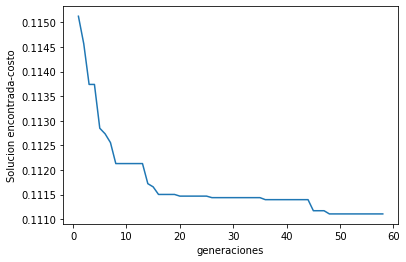

solucion 
   k   f   v   d   c   h   n   t   z   q
      j   m   b   e   a   r   o   u   s   g
       ñ   w   p   i   y   x   l


In [ ]:
poblacion = Poblacion(
                n_individuos = 100,
                n_variables  = 27,
                verbose      = False
            )
#leer instancia
arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
            0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]

poblacion.optimizar(
    funcion_objetivo   = funcion_objetivo,
    optimizacion       = "minimizar",
    n_generaciones     = 500,
    metodo_seleccion   = "rank",
    elitismo           = 0.1,
    prob_mut           = 0.01,
    distribucion       = "uniforme",
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-16,
    verbose            = True,
    Grafo = arregloP,
    ArregloD=arregloD
)
costos = poblacion.historico_mejor_valor_funcion
fig, ax = plt.subplots()
ax.plot(list(range(1,len(costos)+1)), costos)
ax.set_xlabel("generaciones")
ax.set_ylabel("Solucion encontrada-costo")
plt.show()
primeraLinea=""
segundaLinea=""
terceraLinea=""

letras="abcdefghijklmnñopqrstuvwxyz"
n=0
for i in poblacion.valor_variables_optimo:
  if n <10:
    primeraLinea+=(" "*3)+letras[i]
  
  elif n <20:
    segundaLinea+=(" "*3)+letras[i]
  elif n <27:
    terceraLinea+=(" "*3)+letras[i]
  n+=1
print("solucion ")
print(primeraLinea)
print(" "*2,segundaLinea)
print(" "*3,terceraLinea)

/------------
generacion:  0
------------/
/------------
generacion:  1
------------/
/------------
generacion:  2
------------/
/------------
generacion:  3
------------/
/------------
generacion:  4
------------/
/------------
generacion:  5
------------/
/------------
generacion:  6
------------/
/------------
generacion:  7
------------/
/------------
generacion:  8
------------/
/------------
generacion:  9
------------/
/------------
generacion:  10
------------/
/------------
generacion:  11
------------/
/------------
generacion:  12
------------/
/------------
generacion:  13
------------/
/------------
generacion:  14
------------/
/------------
generacion:  15
------------/
/------------
generacion:  16
------------/
/------------
generacion:  17
------------/
/------------
generacion:  18
------------/
/------------
generacion:  19
------------/
/------------
generacion:  20
------------/
/------------
generacion:  21
------------/
/------------
generacion:  22
------------

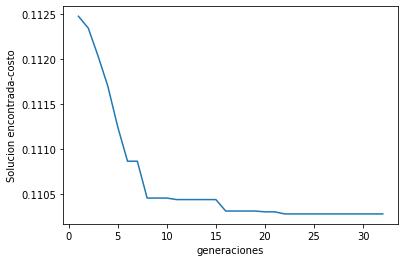

solucion 
   k   g   v   o   q   b   p   c   x   j
      z   t   i   e   r   s   a   d   ñ   w
       f   y   m   n   u   h   l


In [ ]:
poblacion = Poblacion(
                n_individuos = 1000,
                n_variables  = 27,
                verbose      = False
            )
#leer instancia
arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
            0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]

poblacion.optimizar(
    funcion_objetivo   = funcion_objetivo,
    optimizacion       = "minimizar",
    n_generaciones     = 500,
    metodo_seleccion   = "rank",
    elitismo           = 0.1,
    prob_mut           = 0.01,
    distribucion       = "uniforme",
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-16,
    verbose            = True,
    Grafo = arregloP,
    ArregloD=arregloD
)
costos = poblacion.historico_mejor_valor_funcion
fig, ax = plt.subplots()
ax.plot(list(range(1,len(costos)+1)), costos)
ax.set_xlabel("generaciones")
ax.set_ylabel("Solucion encontrada-costo")
plt.show()
primeraLinea=""
segundaLinea=""
terceraLinea=""

letras="abcdefghijklmnñopqrstuvwxyz"
n=0
for i in poblacion.valor_variables_optimo:
  if n <10:
    primeraLinea+=(" "*3)+letras[i]
  
  elif n <20:
    segundaLinea+=(" "*3)+letras[i]
  elif n <27:
    terceraLinea+=(" "*3)+letras[i]
  n+=1
print("solucion ")
print(primeraLinea)
print(" "*2,segundaLinea)
print(" "*3,terceraLinea)

/------------
generacion:  0
------------/
/------------
generacion:  1
------------/
/------------
generacion:  2
------------/
/------------
generacion:  3
------------/
/------------
generacion:  4
------------/
/------------
generacion:  5
------------/
/------------
generacion:  6
------------/
/------------
generacion:  7
------------/
/------------
generacion:  8
------------/
/------------
generacion:  9
------------/
/------------
generacion:  10
------------/
/------------
generacion:  11
------------/
/------------
generacion:  12
------------/
/------------
generacion:  13
------------/
/------------
generacion:  14
------------/
/------------
generacion:  15
------------/
/------------
generacion:  16
------------/
/------------
generacion:  17
------------/
/------------
generacion:  18
------------/
/------------
generacion:  19
------------/
/------------
generacion:  20
------------/
/------------
generacion:  21
------------/
/------------
generacion:  22
------------

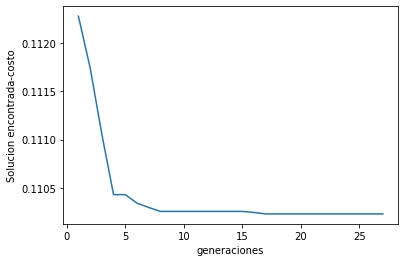

solucion 
   k   x   q   l   u   b   s   d   h   ñ
      g   f   n   a   o   t   e   m   c   v
       w   j   y   r   p   z   i


In [ ]:
poblacion = Poblacion(
                n_individuos = 10000,
                n_variables  = 27,
                verbose      = False
            )
#leer instancia
arregloP = [0.1315,0.0165,0.0414,0.0470,0.1345,0.0069,0.0104,0.0100,0.0665,0.0049,0.0004,0.0555,0.0285,0.0686,0.0018,0.0902,
            0.0254,0.0123,0.0654,0.0712,0.0411,0.0445,0.0104,0.0001,0.0016,0.0092,0.0042]
arregloD =[0.14,0.13,0.12,0.11,0.12,0.12,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.10,0.11,0.11,0.10,0.11,0.12,0.13,0.14,0.13,0.12,0.11,0.12,0.12,0.11]

poblacion.optimizar(
    funcion_objetivo   = funcion_objetivo,
    optimizacion       = "minimizar",
    n_generaciones     = 500,
    metodo_seleccion   = "rank",
    elitismo           = 0.1,
    prob_mut           = 0.01,
    distribucion       = "uniforme",
    parada_temprana    = True,
    rondas_parada      = 10,
    tolerancia_parada  = 10**-16,
    verbose            = True,
    Grafo = arregloP,
    ArregloD=arregloD
)
costos = poblacion.historico_mejor_valor_funcion
fig, ax = plt.subplots()
ax.plot(list(range(1,len(costos)+1)), costos)
ax.set_xlabel("generaciones")
ax.set_ylabel("Solucion encontrada-costo")
plt.show()
primeraLinea=""
segundaLinea=""
terceraLinea=""

letras="abcdefghijklmnñopqrstuvwxyz"
n=0
for i in poblacion.valor_variables_optimo:
  if n <10:
    primeraLinea+=(" "*3)+letras[i]
  
  elif n <20:
    segundaLinea+=(" "*3)+letras[i]
  elif n <27:
    terceraLinea+=(" "*3)+letras[i]
  n+=1
print("solucion ")
print(primeraLinea)
print(" "*2,segundaLinea)
print(" "*3,terceraLinea)